In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
X=glass.iloc[:,0:8]
Y=glass.iloc[:,-1]     # dividng into the dataset into features and target variables

In [4]:
X_norm=scale(X) # Normalising the features values fro further process
X_norm

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.67170546,
        -0.14576634, -0.35287683],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.02621325,
        -0.79373376, -0.35287683],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.16453301,
        -0.82894938, -0.35287683],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.76391864,
        -0.36410319,  2.95320036],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.76391864,
        -0.33593069,  2.81208731],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.76391864,
        -0.23732695,  3.01367739]])

GRID_SEARCH TUNING ALGORITHM  CV:first lets find the  best k nearest neighbors using the grid search

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X=glass.iloc[:,0:8]
Y=glass.iloc[:,-1]     # dividing the dataset  into X nad Y paramters

In [7]:
n_neighbors=np.array([2*i+1 for i in range (0,10)])
param_grid=dict(n_neighbors=n_neighbors)

In [8]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [9]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 1}


as per the Grid search crossvalidation best Knearest Neighbor and the best value is 1 and 0.6498

In [10]:
# lets find the best valdiation with KFold
n_folds=5
kfolds=KFold(n_splits=5)

In [11]:
model=KNeighborsClassifier(n_neighbors=3)
result=cross_val_score(model,X_norm,Y,cv=5)   # here n_neighbors is selected based on the Grid_search tuning value i.s the best params

In [12]:
print(result.mean())

0.6871539313399778


VISUALIATION OF CV RESULTS

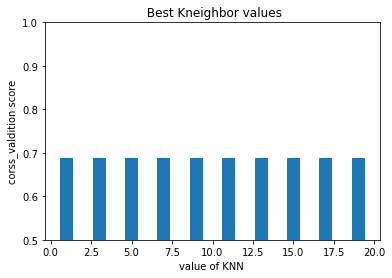

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range=[2*i+1 for i in range (0,10)]
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(model,X_norm,Y,cv=5)
    k_score.append(scores.mean())
    
plt.bar(k_range,k_score)
plt.xlabel("value of KNN ")
plt.ylabel("corss_valdition score")
plt.ylim(.5,1)
plt.title(" Best Kneighbor values")
plt.show()
       

SO THE BEST K NEAREST NEIGHBOURS FOR THIS MODEL IS 1 AND THE BEST SCORES IS ABOUT0.64983